In [2]:
from IPython.display import Image

# Portfolio Optimization using Python

In this tutorial you will learn:
1. What is portfolio optimization?
   * What does a portfolio mean?
   * What are assets, returns and risk?
   * Modern Portfolio Theory (MPT)
   * Efficient Frontier
2. Fundamental terms in portfolio optimization
   * Variance
   * Volatility
   * Covariance
   * Correlation
   * Expected Returns
3. Building and optimal risky portfolio
   * Covariance and correlation matrix
   * Portfolio variance
   * Portfolio expected returns
   * Plotting the efficient frontier
   * Sharpe Ratio
   * Optimal Risky Portfolio

## What is portfolio optimization?

Portfolio optimization means creating a portfolio of assets, for which your investment has the maximum return and minimum risk factor.

Dont worry if all these terms made no sense to you, we will go over each one in detail.

### What does a portfolio mean?

An investor's portfolio basically is his/her investement in different kinds of assets from different companies. 
For example, if you have some investment in 3 companies, namely Google, Amazon and Tesla, then these 3 companies make up your investment portfolio. But how do you invest in a company? You do so by purchasing assets of that company.

### What are assets, returns and risk?

**Assets** are of various kinds. An asset is what you would purchase if you want to invest in a comapany.
These include, but are not limited to:
* Bonds
* Stocks
* Cash
* Real Estate

Usually when you build a portfolio, it is advisable to diversify your assets, or purchase different kinds of assets from different companies. For all assets, you will get a profit after a specified period of time. 

This profit is what we call **returns**. For example, you will get returns from stocks when it's market value goes up and similarly you will get returns from cash in form of interest.
But what if the comapany whose stocks you have purchased goes bankrupt? This will lead to its stocks crashing in the share market and instead of gaining profits, you will also lose your capital investment.

This is what is called **risk** of investment.
A good portfolio is one which gives us maximum return on our investment for minimum risk, as discussed earlier.
The next question is, how do we decide out of an infinite possible combinations for portfolios, the one which is optimum?

### Modern Portfolio Theory (MPT)

*Modern Portfolio Theory, or also known as mean-variance analysis is a mathematical process which allows the user to maximise returns for a given risk level.*

It was formulated by H. Markowitz and while it is not the only optimization technique known, it is the most widely used.
MPT assumes that all investors are risk-averse, i.e, if there is a choice between low risk and high risk portfolios with the same returns, an investor will choose one with the low risk.

MPT encourages diversification of assets and says that a high variance asset A if combined with diverse assets B and C, where A, B and C have little to no correlation, can give us a portfolio with low variance on returns.

### Efficient Frontier

*The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return*. 

Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk. Portfolios that cluster to the right of the efficient frontier are sub-optimal because they have a higher level of risk for the defined rate of return.

Now that you understand the term of portfolio optimization, let's see how its actually carried out.

## Fundamental terms in portfolio optimization

There are some statistical terms required in optimization process without which an optimal portfolio can't be defined.
We will go through each one through an example.
In this example, we are considering a portfolio made up of stocks from 2 companies, Tesla and Facebook.

The first step is to is to pull the required data from a verified site such as Yahoo or Quandl. The example below uses Yahoo and the dates for which we will be pulling the data is from 1st January, 2018 to 31st December, 2019.

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
test = data.DataReader(['TSLA', 'FB'], 'yahoo', start='2018/01/01', end='2019/12/31')
test.head()

Attributes   Adj Close                   Close                    High  \
Symbols           TSLA          FB        TSLA          FB        TSLA   
Date                                                                     
2018-01-02  320.529999  181.419998  320.529999  181.419998  322.109985   
2018-01-03  317.250000  184.669998  317.250000  184.669998  325.250000   
2018-01-04  314.619995  184.330002  314.619995  184.330002  318.549988   
2018-01-05  316.579987  186.850006  316.579987  186.850006  317.239990   
2018-01-08  336.410004  188.279999  336.410004  188.279999  337.019989   

Attributes                     Low                    Open              \
Symbols             FB        TSLA          FB        TSLA          FB   
Date                                                                     
2018-01-02  181.580002  311.000000  177.550003  312.000000  177.679993   
2018-01-03  184.779999  315.549988  181.330002  321.000000  181.880005   
2018-01-04  186.210007  305.679993  184.100006  312.869995  184.899994   
2018-01-05  186.899994  312.000000  184.929993  316.619995  185.589996   
2018-01-08  188.899994  315.500000  186.330002  316.000000  187.199997   

Attributes   Volume            
Symbols        TSLA        FB  
Date                           
2018-01-02  4352200  18151900  
2018-01-03  4521500  16886600  
2018-01-04  9946300  13880900  
2018-01-05  4591200  13574500  
2018-01-08  9859400  17994700

As you can see, there are a lot of different columns for different prices throughout the day, but we will only focus on the 'Adj Close' column. This colum gives us the closing price of company's stock on the given day.

In [3]:
test = test['Adj Close']
test.head()

Symbols,TSLA,FB
Date,,
2018-01-02,320.529999,181.419998
2018-01-03,317.250000,184.669998
2018-01-04,314.619995,184.330002
2018-01-05,316.579987,186.850006
2018-01-08,336.410004,188.279999


Next, we claculate the percentage change in stock prices of tesla everyday. You will notice that that we take the log of percentage change.
The reason for this is that log percentage change is **time additive**. 

This means a log change of +0.1 today and then -0.1 tomorrow will give you the same value of stock as yesterday. This is not true for percentage change.

It is common practice in portfolio optimization to take log of change for calculations of covariance and correlation.

In [6]:
tesla = test['TSLA'].pct_change().apply(lambda x: np.log(1+x))
tesla.head()

Date
2018-01-02         NaN
2018-01-03   -0.010286
2018-01-04   -0.008325
2018-01-05    0.006210
2018-01-08    0.060755
Name: TSLA, dtype: float64

### Variance 

The variance in prices of stocks of Tesla are an important indicator of how volatile this investement will be (how returns can fluctuate). It can be calculated for each company by using built in `.var()` function. Under the hood, the formula implemented by this function is given by:

In [4]:
Image('variance.png')

In [12]:
var_tesla = tesla.var()
var_tesla

0.0011483733553245667

Similarly for Facebook,

In [8]:
fb = test['FB'].pct_change().apply(lambda x: np.log(1+x))
fb.head()

Date
2018-01-02         NaN
2018-01-03    0.017756
2018-01-04   -0.001843
2018-01-05    0.013579
2018-01-08    0.007624
Name: FB, dtype: float64

In [13]:
var_fb = fb.var()
var_fb

0.00045697258417022536

### Volatility

Volatility is the measure of standard deviation of a company's stock. If you carefully look at the formula for standard deviation, you will understand that it is just the square root of variance.

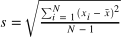

In [5]:
Image('std.png')

But volatility is the annual standard deviation. What we get from square root of variance is the daily standard deviation. To convert it to annual standard deviation we multiply the variance by 250.

250 is used because there are 250 trading days in a year.

In [17]:
tesla_vol = np.sqrt(var_tesla * 250)
fb_vol = np.sqrt(var_fb * 250)
tesla_vol, fb_vol

(0.5358109170511008, 0.33799873674698305)

We can plot the volatility of both Tesla and Facebook for better visualization.

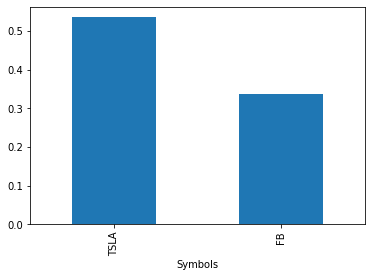

In [18]:
test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

### Covariance

*Covariance measures the directional relationship between the returns on two assets*.

A positive covariance means that asset returns move together while a negative covariance means they move inversely. Risk and volatility can be reduced in a portfolio by pairing assets that have a negative covariance.

We can calculate the covariance of Tesla and Facebook by using the `.cov()` function.

In [44]:
test1 = test.pct_change().apply(lambda x: np.log(1+x))
test1.head()

Symbols,TSLA,FB
Date,,
2018-01-02,NaN,NaN
2018-01-03,-0.010286,0.017756
2018-01-04,-0.008325,-0.001843
2018-01-05,0.006210,0.013579
2018-01-08,0.060755,0.007624


In [45]:
test1['TSLA'].cov(test1['FB'])

0.00018261619225049997

You can notice that there is positive covarinace between Tesla and Facebook. So when the stock prices of Tesla go up, so do the stock prices of Facebook.

### Correlation

Correlation, in the finance and investment industries, is a statistic that measures the degree to which two securities move in relation to each other. Correlations are used in advanced portfolio management, computed as the correlation coefficient, which has a value that must fall between -1.0 and +1.0.

A correlation of -1 means negative relation, i.e, if correlation between Asset A and Asset B is -1, if Asset A increases, Asset B decreases.

A correlation of +1 means positive relation, i.e, if correlation between Asset A and Asset B is 1, if Asset A increases, Asset B increases.

A correlation of 0 means no relation, i.e, if correlation between Asset A and Asset B is 0, they dont have any effect on each other.

This is calculated using the `.corr()` function.

In [46]:
test1['TSLA'].corr(test1['FB'])

0.2520882808420106

In line with the covariance, the correlation between Tesla and Facebook is also positive.

### Expected Returns

For expected returns, you need to define weights for the assets choosen. In simpler terms, this means deciding how much of your money to invest on which company's stock. Usually this decision is done by using the optimization techniques we will discuss later but for now we will consider random weights for Tesla and Facebook.

In [59]:
test2 = test.pct_change().apply(lambda x: np.log(1+x))
test2.head()

Symbols,TSLA,FB
Date,,
2018-01-02,NaN,NaN
2018-01-03,-0.010286,0.017756
2018-01-04,-0.008325,-0.001843
2018-01-05,0.006210,0.013579
2018-01-08,0.060755,0.007624


We define an array of random weights for the purpose of calculation.
Note that the expected returns of an asset are simply the mean of percentage change in its stock prices. The value of expected return we obtain here are daily expected returns.

For an yearly expected return value, you will need to resample the data year-wise, as you will see further.

In [60]:
w = [0.2, 0.8]
e_r_ind = test2.mean()
e_r_ind

Symbols
TSLA    0.000530
FB      0.000246
dtype: float64

The total expected return for a portfolio is given by:

In [6]:
Image('er.png')

Thus, `e_r`, or total expected return can be calculated as:

In [61]:
e_r = (e_r_ind*w).sum()
e_r

0.0003027691568441302

## Building and optimal risky portfolio

Now that you have gone through the building blocks of portfolio optimization, it is time to create an optimal portfolio using the same concepts. Now, we will be using stocks from 4 companies, namely, Apple, Nike, Google and Amazon for a period of 5 years. you will learn to calculate the weights of assets for each one. Then, we will calculate the expected returns, minimum variance portfolio, optimal risky portfolio and efficient frontier. You will also learn a new term called Sharpe Ratio. 

Let's get started by pulling the required asset data from Yahoo.

In [63]:
df = data.DataReader(['AAPL', 'NKE', 'GOOGL', 'AMZN'], 'yahoo', start='2015/01/01', end='2019/12/31')
df.head()

Attributes   Adj Close                                          Close  \
Symbols           AAPL        NKE       GOOGL        AMZN        AAPL   
Date                                                                    
2014-12-31  100.905785  44.553085  530.659973  310.350006  110.379997   
2015-01-02   99.945885  44.034115  529.549988  308.519989  109.330002   
2015-01-05   97.130241  43.325157  519.460022  302.190002  106.250000   
2015-01-06   97.139420  43.070297  506.640015  295.290009  106.260002   
2015-01-07   98.501518  43.959976  505.149994  298.420013  107.750000   

Attributes                                           High             ...  \
Symbols           NKE       GOOGL        AMZN        AAPL        NKE  ...   
Date                                                                  ...   
2014-12-31  48.075001  530.659973  310.350006  113.129997  48.805000  ...   
2015-01-02  47.514999  529.549988  308.519989  111.440002  48.474998  ...   
2015-01-05  46.750000  519.460022  302.190002  108.650002  47.275002  ...   
2015-01-06  46.474998  506.640015  295.290009  107.430000  47.075001  ...   
2015-01-07  47.435001  505.149994  298.420013  108.199997  47.650002  ...   

Attributes         Low                    Open                         \
Symbols          GOOGL        AMZN        AAPL        NKE       GOOGL   
Date                                                                    
2014-12-31  530.200012  310.010010  112.820000  48.485001  537.739990   
2015-01-02  527.880005  306.959991  111.389999  48.275002  532.599976   
2015-01-05  517.750000  300.850006  108.290001  47.255001  527.150024   
2015-01-06  505.549988  292.380005  106.540001  46.945000  520.500000   
2015-01-07  503.649994  295.329987  107.199997  46.805000  510.950012   

Attributes                  Volume                                   
Symbols           AMZN        AAPL        NKE      GOOGL       AMZN  
Date                                                                 
2014-12-31  311.549988  41403400.0  4697400.0  1232400.0  2048000.0  
2015-01-02  312.579987  53204600.0  4985800.0  1324000.0  2783200.0  
2015-01-05  307.010010  64285500.0  6889200.0  2059100.0  2774200.0  
2015-01-06  302.239990  65797100.0  7576000.0  2722800.0  3519000.0  
2015-01-07  297.500000  40105900.0  7256000.0  2345900.0  2640300.0  

[5 rows x 24 columns]

Just like earlier, we will only keep the 'Adj Close' column to perform our calculations.

In [64]:
df = df['Adj Close']
df.head()

Symbols,AAPL,NKE,GOOGL,AMZN
Date,,,,
2014-12-31,100.905785,44.553085,530.659973,310.350006
2015-01-02,99.945885,44.034115,529.549988,308.519989
2015-01-05,97.130241,43.325157,519.460022,302.190002
2015-01-06,97.139420,43.070297,506.640015,295.290009
2015-01-07,98.501518,43.959976,505.149994,298.420013


### Covariance and Correlation matrix

The first step is to obtain a covariance and correlation matrix to understand how different assets behave with respect to each other. When we had a 2 asset portfolio, we directly plugged in the names of the assets into `.cov()` and `.corr()` functions. In this case, we will need a matrix for better visualisation. This is also achieved by using the same 2 functions on our dataframe `df`.

Note that we perform necessary operations to display log change in prices of stocks each day.

In [68]:
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,AAPL,NKE,GOOGL,AMZN
Symbols,,,,
AAPL,0.000245,0.000084,0.000122,0.000142
NKE,0.000084,0.000219,0.000085,0.000092
GOOGL,0.000122,0.000085,0.000221,0.000176
AMZN,0.000142,0.000092,0.000176,0.000333


The covariance between Apple and Apple, or Nike and Nike is the variance of that asset.

The next step is to create the correlation matrix. Correlation ranges from -1 to 1.

* A correlation of -1 means negative relation, i.e, if correlation between Asset A and Asset B is -1, if Asset A increases, Asset B decreases.
* A correlation of +1 means positive relation, i.e, if correlation between Asset A and Asset B is 1, if Asset A increases, Asset B increases.
* A correlation of 0 means no relation, i.e, if correlation between Asset A and Asset B is 0, they dont have any effect on each other.

In [66]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,AAPL,NKE,GOOGL,AMZN
Symbols,,,,
AAPL,1.000000,0.361145,0.524819,0.496704
NKE,0.361145,1.000000,0.387533,0.341431
GOOGL,0.524819,0.387533,1.000000,0.647952
AMZN,0.496704,0.341431,0.647952,1.000000


As you can see, an asset always has a perfectly positive correlation of 1 with itself.

### Portfolio Variance

The formula for calculating portfolio variance differs from the usual formula of variance. It looks like this:

In [7]:
Image('portvar.png')

Here, wi and wj denote weights of all assets from 1 to n (in our case from 1 to 4) and COV(Ri, Rj) is the covariance of the two assets denoted by i and j.

The simplest way to do this complex calculation is defining a list of weights and multiplying this list horizontally and vertically with our covariance matrix.

For this purpose, let's define a random list of weights for all 4 assets. Remember that sum of weights should always be 1.

In [70]:
w = {'AAPL': 0.1, 'NKE': 0.2, 'GOOGL': 0.5, 'AMZN': 0.2}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.00016069522961306327

Thus we have found the portfolio variance. But for truly optimizing the portfolio, we cant plug in random weights. We will need to calculate it according to what gives us maximum expected returns.

How will you find the portfolio expected return?

### Portfolio expected returns

The mean of returns (given by change in prices of asset stock prices) give us the expected returns of that asset.
The sum of all individual expected returns further multiplied by the weight of assets give us expected return for the portfolio.

Note that we use the `resample()` function to get yearly returns. The argument to function, 'Y', denotes yearly.
If we dont perform resampling, we will get daily returns, like you saw earlier in the 'Fundamental Terms' section.

In [75]:
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

Symbols
AAPL     0.282997
NKE      0.195950
GOOGL    0.217545
AMZN     0.472289
dtype: float64

In [76]:
w = [0.1, 0.2, 0.5, 0.2]
port_er = (w*ind_er).sum()
port_er

0.2707198982386542

### Plotting the efficient frontier

This is the aim of going through all the topics above, to plot the efficient frontier. Efficient frontier is a graph with returns on the x-axis and volatility on the y-axis. It shows us the maximum return we can get for a set level of volatility, or conversely, the volatility that we need to accept for certain level of returns.

The plot of efficient frontier looks something like this:

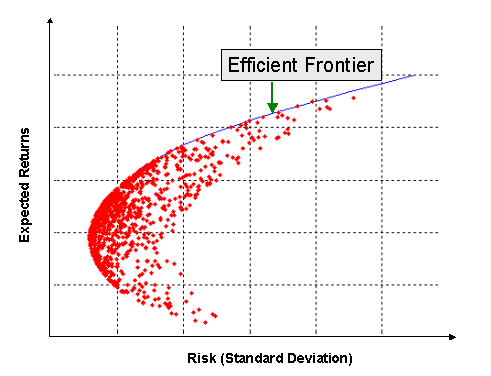

In [10]:
Image('ef.gif')

Below, you can see the calculations and code for finding the optimal weights of assets and plotting the efficient frontier for given portfolio.
But first, lets take a look at the volatiltilty and returns of individual assets for a better understanding.

In [78]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
AAPL     0.247734
NKE      0.233798
GOOGL    0.235191
AMZN     0.288559
dtype: float64

In [79]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
AAPL,0.282997,0.247734
NKE,0.195950,0.233798
GOOGL,0.217545,0.235191
AMZN,0.472289,0.288559


Amazon has the maximum risk attached but it also offers the maximum returns. Apple lies somewhere in the middle, with average risk and return rates. 

Next, to plot the graph of efficient frontier, we need run a loop. In each iteration, the loop considers different weights for assets and calculates the return and volatility of that particular portfolio combination. 

We run this loop a 1000 times.

To get random numbers for weights, we use the `np.random.random()` function. But remember that the sum of weights must be 1, so we divide those weights by their cumulative sum.
Keep reading further to see how it's done.

In [92]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [93]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [94]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [95]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,AAPL weight,NKE weight,GOOGL weight,AMZN weight
0,0.248501,0.189779,0.122070,0.369137,0.387347,0.121446
1,0.366765,0.219174,0.154476,0.254111,0.023796,0.567617
2,0.325938,0.209989,0.360278,0.074069,0.226444,0.339209
3,0.280507,0.191881,0.345873,0.269177,0.203840,0.181110
4,0.332890,0.203946,0.279328,0.299568,0.014691,0.406413


You can see that there are a number of portfolios with different weights, returns and volatility. Plotting the returns and volatility from this dataframe will give us the efficient frontier for our portfolio.

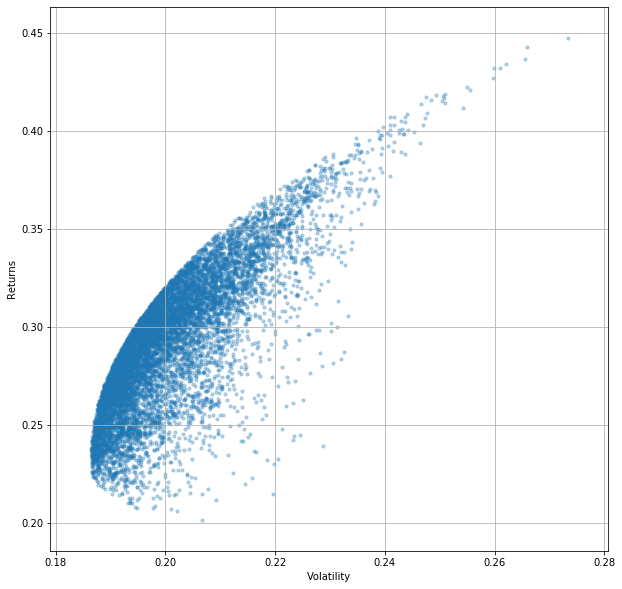

In [99]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

This is similar to what we expected from the standard graph. On this graph, we can also determine te combination of weights that will give us the minimum volatility on returns.

In [110]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns         0.236548
Volatility      0.186502
AAPL weight     0.265189
NKE weight      0.390052
GOOGL weight    0.305232
AMZN weight     0.039526
Name: 8644, dtype: float64

The minimum volatility is in a portfolio where the weights of Apple, Nike, Google and Amazon are 26%, 39%, 30% and 4% respectively. This point can be plotted on the efficient frontier graph as shown:

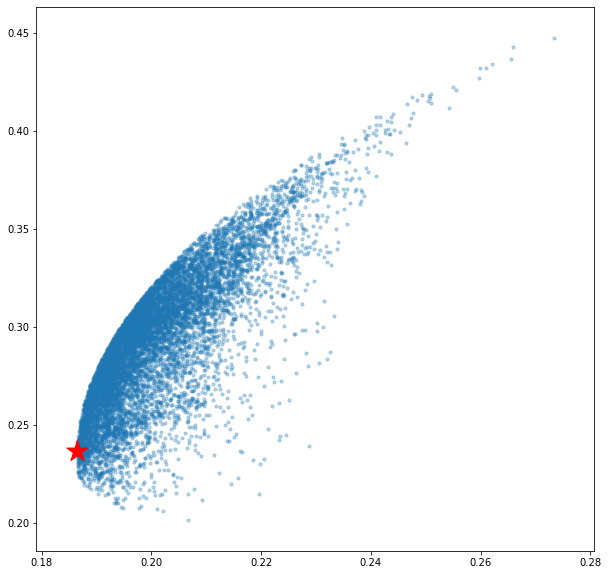

In [111]:
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

The red star denotes the most efficient portfolio with minimum volatility.

It is worthwhile to note that any point to the right of efficient frontier boundary is a sup-optimal portfolio.

We found the portfolio with minimum volatility, but you will notice that the return on this portfolio is pretty low. Any sensible investor wants to maximize his return, even if it is a tradeoff with some level of risk. The question arises that how do we find this optimal risky portfolio and finally optimize our portfolio to the maximum?

This is done by using a parameter called the Sharpe Ratio.

### Sharpe Ratio

The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

The risk-free rate of return is the return on an investment with zero risk, meaning it's the return investors could expect for taking no risk.

The optimal risky portfolio is the one with the highest Sharpe ratio. The formula for this ratio is:

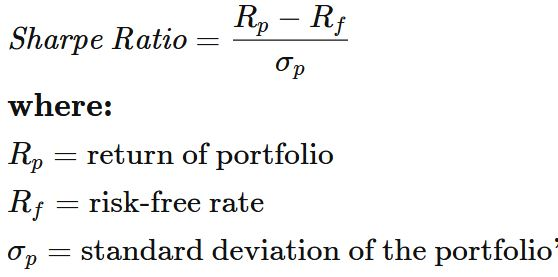

In [9]:
Image('Sharpe Ratio.jpg')

Below is the code for finding out portfolio with maximum Sharpe Ratio. This portfolio is the optimized portfolio that we wanted to find. We define the risk-free rate to be 1% or 0.01.

## Optimal Risky Portfolio

In [118]:
rf = 0.01
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.407134
Volatility      0.240872
AAPL weight     0.240090
NKE weight      0.071187
GOOGL weight    0.000145
AMZN weight     0.688579
Name: 2032, dtype: float64

You can notice that while the difference in risk between minimum volatility portfolio and optimal risky portfolio is just 6%, the difference in returns is a whopping 17%.
We can plot this point too on the graph of efficient frontier.

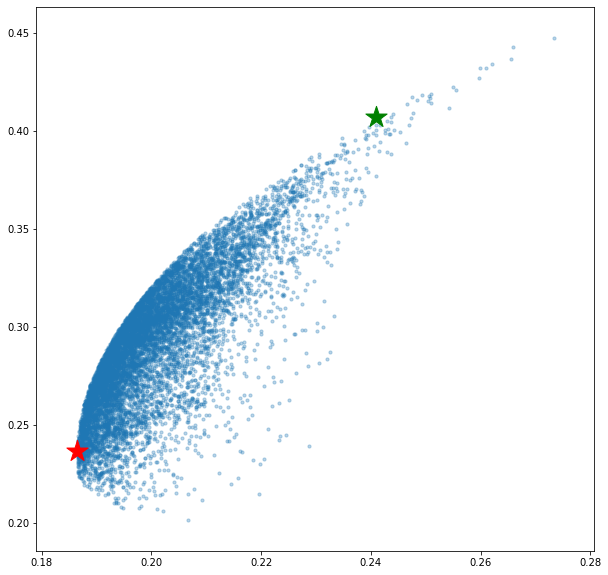

In [117]:
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_var_port[1], min_var_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

The green star represents the optimal risky portfolio.

## References

1. Video series by [Finquest](https://www.youtube.com/watch?v=Mb4H3MaJnl8&list=PLLVfjXL2pnkQQXmBMPu_NIst57AKak5Z1)
2. [Investopedia](https://www.investopedia.com/terms/p/portfoliomanagement.asp)